In [1]:
import os
import tensorflow as tf # Import TensorFlow 
print(tf.version.VERSION) # Check TensorFlow version

2.3.0


# Las imagenes tienen la siguiente estructura de directorios (80% Train, 10% Validation y 10% test)
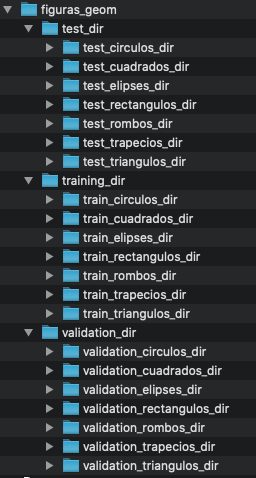





In [2]:
import numpy as np

np.random.seed(42)

In [3]:
#base_dir = '/Users/jorgediazramirez/Documents/DEEP_GEOM/figuras_geom/' #Mac
base_dir = '/content/drive/My Drive/Google Colab/DEEP-GEOM/figuras_geom/' #google colab

train_dir = os.path.join(base_dir, 'training_dir')
validation_dir = os.path.join(base_dir, 'validation_dir')
test_dir = os.path.join(base_dir, 'test_dir')

# Directorios con las imagenes de training
train_circulos_dir = os.path.join(train_dir, 'train_circulos_dir')
train_cuadrados_dir = os.path.join(train_dir, 'train_cuadrados_dir')
train_elipses_dir = os.path.join(train_dir, 'train_elipses_dir')
train_rectangulos_dir = os.path.join(train_dir, 'train_rectangulos_dir')
train_rombos_dir = os.path.join(train_dir, 'train_rombos_dir')
train_trapecios_dir = os.path.join(train_dir, 'train_trapecios_dir')
train_triangulos_dir = os.path.join(train_dir, 'train_triangulos_dir')

# Directorios con las imagenes de validation
validation_circulos_dir = os.path.join(validation_dir, 'validation_circulos_dir')
validation_cuadrados_dir = os.path.join(validation_dir, 'validation_cuadrados_dir')
validation_elipses_dir = os.path.join(validation_dir, 'validation_elipses_dir')
validation_rectangulos_dir = os.path.join(validation_dir, 'validation_rectangulos_dir')
validation_rombos_dir = os.path.join(validation_dir, 'validation_rombos_dir')
validation_trapecios_dir = os.path.join(validation_dir, 'validation_trapecios_dir')
validation_triangulos_dir = os.path.join(validation_dir, 'validation_triangulos_dir')

# Directorios con las imagenes de test
test_circulos_dir = os.path.join(test_dir, 'test_circulos_dir')
test_cuadrados_dir = os.path.join(test_dir, 'test_cuadrados_dir')
test_elipses_dir = os.path.join(test_dir, 'test_elipses_dir')
test_rectangulos_dir = os.path.join(test_dir, 'test_rectangulos_dir')
test_rombos_dir = os.path.join(test_dir, 'test_rombos_dir')
test_trapecios_dir = os.path.join(test_dir, 'test_trapecios_dir')
test_triangulos_dir = os.path.join(test_dir, 'test_triangulos_dir')

In [4]:
#nombres 
train_cir_fnames = os.listdir( train_circulos_dir )
print(train_cir_fnames[:5])

validation_cir_fnames = os.listdir( validation_circulos_dir )
print(validation_cir_fnames[:5])

test_cir_fnames = os.listdir( test_circulos_dir )
print(test_cir_fnames[:5])

['circulo.109.jpg', 'circulo.205.jpg', 'circulo.356.jpg', 'circulo.40.jpg', 'circulo.602.jpg']
['circulo.578.jpg', 'circulo.370.jpg', 'circulo.305.jpg', 'circulo.560.jpg', 'circulo.266.jpg']
['circulo.341.jpg', 'circulo.184.jpg', 'circulo.449.jpg', 'circulo.226.jpg', 'circulo.209.jpg']


In [5]:
#largos
print('total imagenes circulos training :', len(os.listdir(train_circulos_dir)))
print('total imagenes circulos validation :', len(os.listdir(validation_circulos_dir)))
print('total imagenes circulos test :', len(os.listdir(test_circulos_dir)))

total imagenes circulos training : 520
total imagenes circulos validation : 65
total imagenes circulos test : 66


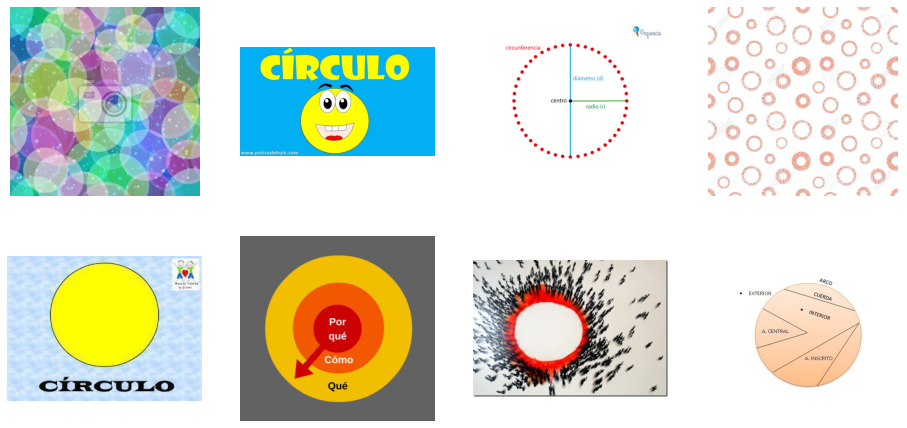

In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 # Índice para iterar sobre las imagenes

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cir_pix = [os.path.join(train_circulos_dir, fname)
                for fname in train_cir_fnames[ pic_index-8:pic_index]
]

for i, img_path in enumerate(next_cir_pix):
   sp = plt.subplot(nrows, ncols, i + 1)
   sp.axis('Off') # no imprimir ejes
   img = mpimg.imread(img_path)
   plt.imshow(img)

plt.show()

In [ ]:
#modelo basico 1
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                  batch_size=20,
                  class_mode='categorical', #mas de 2 clases
                  target_size=(150, 150))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                  batch_size=20,
                  class_mode = 'categorical',
                  target_size = (150, 150))

test_generator = test_datagen.flow_from_directory(validation_dir,
                  batch_size=20,
                  class_mode = 'categorical',
                  target_size = (150, 150))

Found 2557 images belonging to 7 classes.
Found 319 images belonging to 7 classes.
Found 319 images belonging to 7 classes.


In [ ]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

127
15


In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-4),
   loss='categorical_crossentropy',
   metrics = ['accuracy']
   )

In [ ]:
history = model.fit(
             train_generator,
             steps_per_epoch= steps_per_epoch,
             epochs=100,
             validation_data=validation_generator,
             validation_steps= validation_steps,
             verbose=2)

Epoch 1/100
127/127 - 116s - loss: 1.1921e-07 - accuracy: 0.8470 - val_loss: 1.1921e-07 - val_accuracy: 0.8429
Epoch 2/100
127/127 - 116s - loss: 1.1921e-07 - accuracy: 0.8467 - val_loss: 1.1921e-07 - val_accuracy: 0.8405
Epoch 3/100
127/127 - 115s - loss: 1.1921e-07 - accuracy: 0.8470 - val_loss: 1.1921e-07 - val_accuracy: 0.8405
Epoch 4/100
127/127 - 115s - loss: 1.1921e-07 - accuracy: 0.8467 - val_loss: 1.1921e-07 - val_accuracy: 0.8429
Epoch 5/100
127/127 - 116s - loss: 1.1921e-07 - accuracy: 0.8470 - val_loss: 1.1921e-07 - val_accuracy: 0.8405
Epoch 6/100
127/127 - 119s - loss: 1.1921e-07 - accuracy: 0.8473 - val_loss: 1.1921e-07 - val_accuracy: 0.8429
Epoch 7/100
127/127 - 115s - loss: 1.1921e-07 - accuracy: 0.8467 - val_loss: 1.1921e-07 - val_accuracy: 0.8405
Epoch 8/100
127/127 - 116s - loss: 1.1921e-07 - accuracy: 0.8470 - val_loss: 1.1921e-07 - val_accuracy: 0.8429
Epoch 9/100
127/127 - 115s - loss: 1.1921e-07 - accuracy: 0.8467 - val_loss: 1.1921e-07 - val_accuracy: 0.8429
E

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

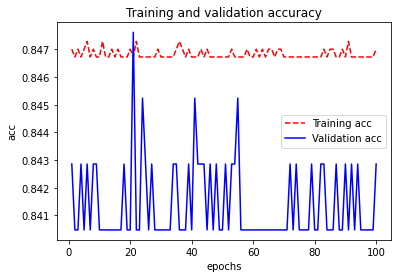

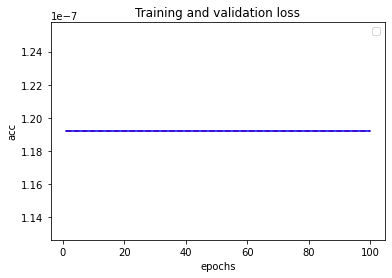

<Figure size 432x288 with 0 Axes>

In [ ]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' )
plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [ ]:
test_lost, test_acc= model.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

16/16 [==============================] - 5s 322ms/step - loss: 1.1921e-07 - accuracy: 0.8415
Test Accuracy: 0.8414688110351562


In [ ]:
model.save('modelo_basico_1.h5')

In [7]:
#modelo basico 2
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [11]:
train_generator = train_datagen.flow_from_directory(train_dir,
                  batch_size=20,
                  class_mode='categorical', #mas de 2 clases
                  target_size=(150, 150))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                  batch_size=20,
                  class_mode = 'categorical',
                  target_size = (150, 150))

test_generator = test_datagen.flow_from_directory(validation_dir,
                  batch_size=20,
                  class_mode = 'categorical',
                  target_size = (150, 150))

Found 2557 images belonging to 7 classes.
Found 319 images belonging to 7 classes.
Found 319 images belonging to 7 classes.


In [12]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

127
15


In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-4),
   loss='categorical_crossentropy',
   metrics = ['accuracy']
   )

In [14]:
history = model.fit(
             train_generator,
             steps_per_epoch= steps_per_epoch,
             epochs=100,
             validation_data=validation_generator,
             validation_steps= validation_steps,
             verbose=2)

Epoch 1/100
127/127 - 1216s - loss: 1.1921e-07 - accuracy: 0.8538 - val_loss: 1.1921e-07 - val_accuracy: 0.8548
Epoch 2/100
127/127 - 128s - loss: 1.1921e-07 - accuracy: 0.8538 - val_loss: 1.1921e-07 - val_accuracy: 0.8548
Epoch 3/100
127/127 - 128s - loss: 1.1921e-07 - accuracy: 0.8538 - val_loss: 1.1921e-07 - val_accuracy: 0.8548
Epoch 4/100
127/127 - 127s - loss: 1.1921e-07 - accuracy: 0.8538 - val_loss: 1.1921e-07 - val_accuracy: 0.8548
Epoch 5/100
127/127 - 127s - loss: 1.1921e-07 - accuracy: 0.8538 - val_loss: 1.1921e-07 - val_accuracy: 0.8548
Epoch 6/100
127/127 - 127s - loss: 1.1921e-07 - accuracy: 0.8538 - val_loss: 1.1921e-07 - val_accuracy: 0.8548
Epoch 7/100
127/127 - 127s - loss: 1.1921e-07 - accuracy: 0.8538 - val_loss: 1.1921e-07 - val_accuracy: 0.8548
Epoch 8/100
127/127 - 127s - loss: 1.1921e-07 - accuracy: 0.8538 - val_loss: 1.1921e-07 - val_accuracy: 0.8548
Epoch 9/100
127/127 - 127s - loss: 1.1921e-07 - accuracy: 0.8538 - val_loss: 1.1921e-07 - val_accuracy: 0.8548


In [15]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

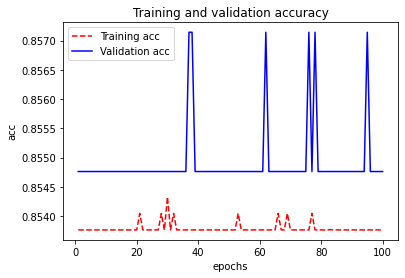

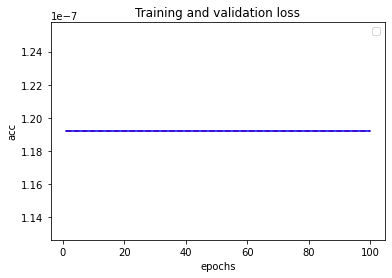

<Figure size 432x288 with 0 Axes>

In [16]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' )
plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [17]:
test_lost, test_acc= model.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

16/16 [==============================] - 6s 358ms/step - loss: 1.1921e-07 - accuracy: 0.8549
Test Accuracy: 0.8549035787582397


In [18]:
model.save('modelo_basico_2.h5')